In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from tensorflow.keras.models import load_model
model1 = load_model("./models/saved_model.h5")
# model2 = load_model("./models/sim_model2.h5")

In [3]:
def only_face(img):
    img=cv2.resize(img, (224,224))
    imgforinference= tf.image.resize(img, (120,120))
    imgforinference=tf.expand_dims(imgforinference, axis=0)
    yhat = model1(imgforinference)
    if yhat[0][0] < 0.9:
        return None
    sample_coords = yhat[1][0]
    x1 = int(sample_coords[0]*224)
    y1 = int(sample_coords[1]*224)
    x2 = int(sample_coords[2]*224)
    y2 = int(sample_coords[3]*224)
    crop = img[y1:y2, x1:x2]
    # print(crop)
    plt.imshow(crop)
    crop = crop*255
    crop = crop.astype(np.uint8)
    crop=cv2.resize(crop, (224,224))
    return crop
    

In [4]:
x1 = cv2.imread("./data1/input_images/WIN_20231028_15_32_48_Pro.jpg")
# x2 = cv2.imread("./data1/input_images/WIN_20231030_21_07_39_Pro.jpg")


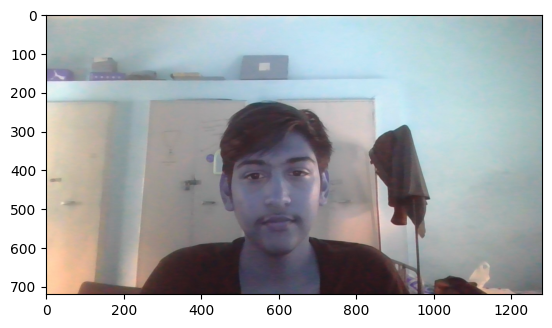

In [5]:
plt.imshow(x1)

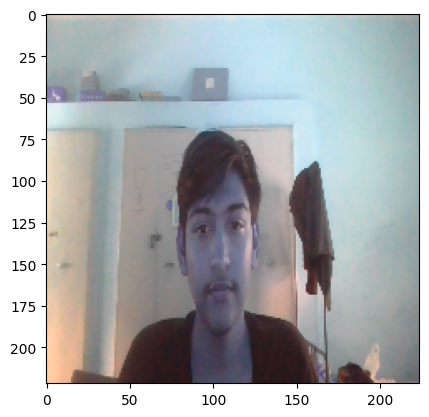

In [6]:
x1 = only_face(x1)
# x2 = only_face(x2)

# print(x1.shape, x2.shape)
# x1 = cv2.cvtColor(x1, cv2.COLOR_BGR2GRAY)
# x2 = cv2.cvtColor(x2, cv2.COLOR_BGR2GRAY)
# print(x1.shape, x2.shape)

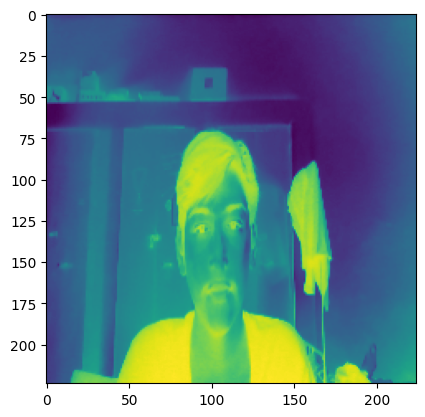

In [23]:
plt.imshow(x1)

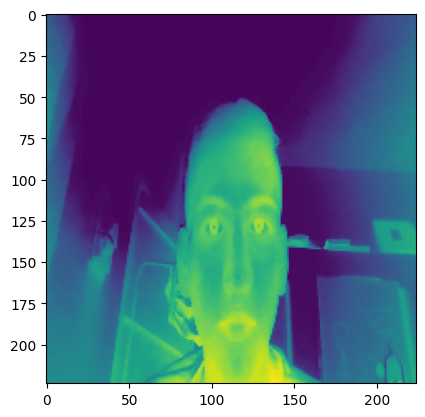

In [24]:
plt.imshow(x2)

In [25]:
x1 = tf.expand_dims(x1, axis=0)
x2 = tf.expand_dims(x2, axis=0)


In [26]:
model2.predict([x1,x2])

1/1 [==============================] - 0s 31ms/step


array([[0.05264553]], dtype=float32)